### variable transformation: means trying to convert the column into normal distributed manner :


- Log transformation - 1/log(eachvalue)
- reciprocal transformation = 1/each value
- square root transformation = sqrt(each value)
- exponential transformation = **
- box cox transformation
- yeo-johnson transformation

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
df = pd.read_csv('house_price.csv')

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# so to compare distributions we will take help of seaborn and scipy packages

In [6]:
df['GrLivArea']

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1460, dtype: int64

In [24]:
# one common function
def plotting(df,var):
    plt.figure(figsize=(7,3))
    plt.subplot(1,3,1)
    # hist
    df[var].hist(bins=20)
    # distplot
    plt.subplot(1,3,2)
    df[var].plot(kind='kde',color='r')
    # probplot
    plt.subplot(1,3,3)
    stats.probplot(df[var],plot = plt)
    plt.show

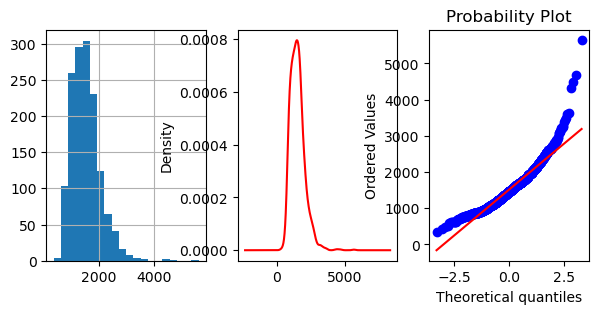

In [25]:
plotting(df,'GrLivArea')

In [27]:
# log transformation

df['GrLivArea_log'] = np.log(df['GrLivArea'])

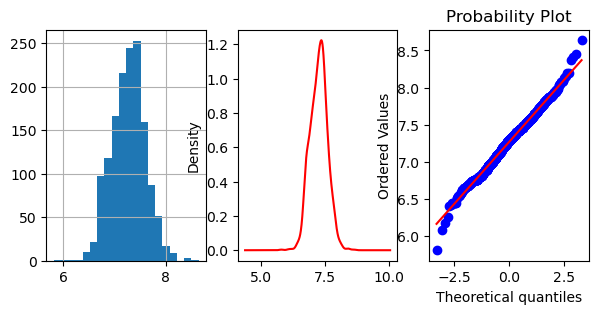

In [30]:
plotting(df,'GrLivArea_log')

In [31]:
# reciprocal
df['GrLivArea_reci'] = 1/df['GrLivArea']


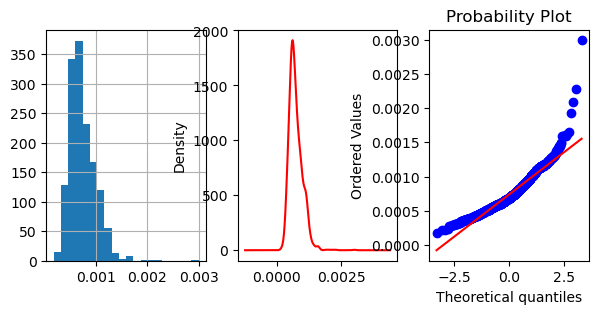

In [32]:
plotting(df,'GrLivArea_reci')

In [33]:
# sqrt
df['GrLivArea_srt'] = np.sqrt(df['GrLivArea'])

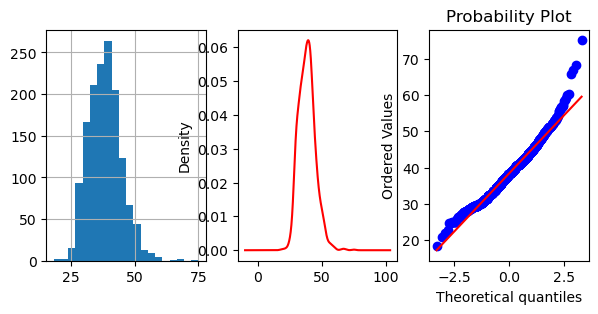

In [34]:
plotting(df,'GrLivArea_srt')

In [35]:
# exponential
np.exp(4)


54.598150033144236

In [38]:
df['GrLivArea_exp'] = df['GrLivArea'] **(1/1.5)

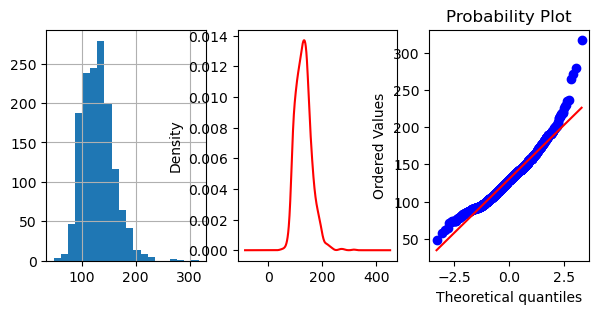

In [40]:
plotting(df,'GrLivArea_exp')

In [41]:
## box cox transformation
df['GrLivArea_bx'] , lambda_ = stats.boxcox(df['GrLivArea'])

In [42]:
lambda_

0.006304924353543215

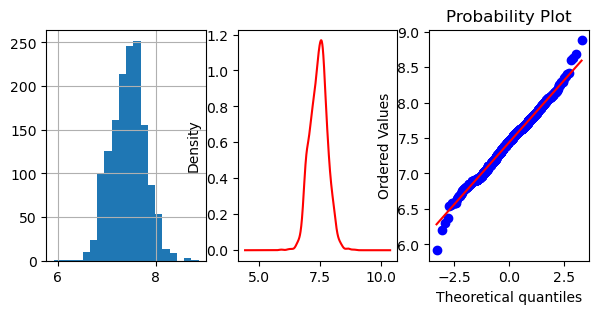

In [43]:
plotting(df, 'GrLivArea_bx')

In [44]:
# yeo-johnson transformation
df['GrLivArea_yeo'], lambda_ = stats.yeojohnson(df['GrLivArea'])

In [45]:
lambda_

0.005539641278705955

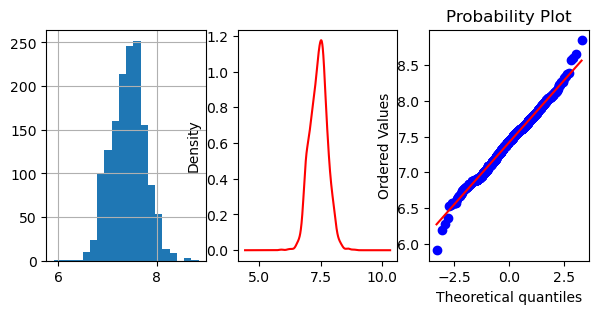

In [46]:
plotting(df,'GrLivArea_yeo')

original
using log
using reciprocal


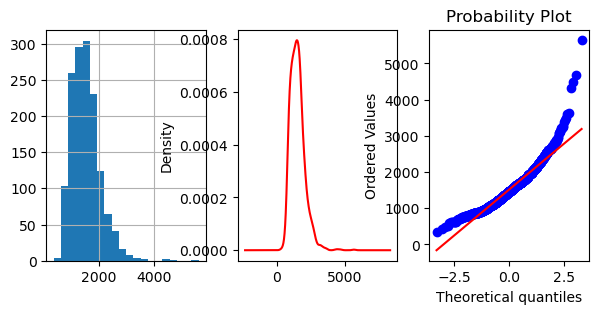

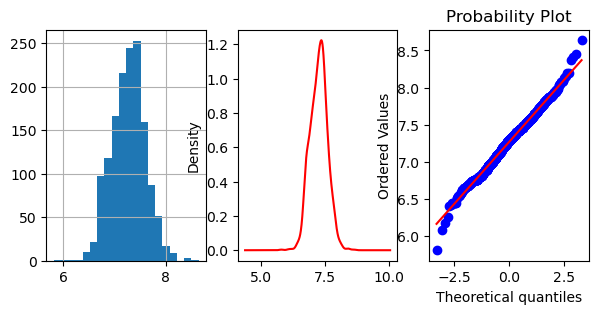

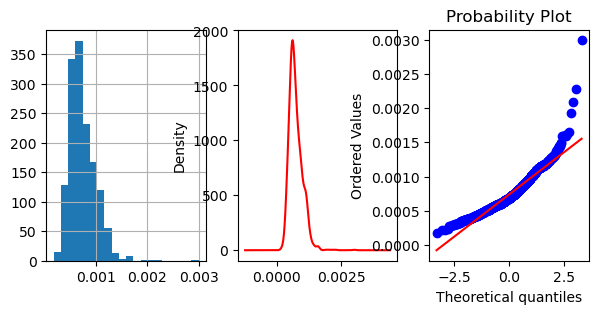

In [52]:
## for loop for these techniques

for i in df.columns:
    if i == 'GrLivArea':
        print('original')
        plotting(df,i)  # original feature
       
        print('using log')
        df['GrLivArea_log'] = np.log(df[i])
        plotting(df,'GrLivArea_log') 
       
        print('using reciprocal')
        df['GrLivArea_reci'] = 1/df[i]
        plotting(df,'GrLivArea_reci')
        
        

project:

- load packages
- loan dataset
- clean data
- split data
- develop model
- check the result
- check validation report
- submit project to mail id [with documentation]